### Data Transformation

In [17]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
df = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

df.head()


,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


In [18]:
df.describe()


,Time,Temperature,Pressure,Chemical Concentration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.000000,19.977372,1013.033617,4.989754
std,28.910854,3.574943,14.203350,1.436505
min,0.000000,13.897407,990.284418,2.559310
25%,25.000000,16.386984,998.852247,3.576024
50%,50.000000,20.008666,1012.950967,4.970976
75%,75.000000,23.570373,1027.062114,6.398067
max,100.000000,26.030294,1035.471676,7.486763


<Axes: ylabel='Frequency'>

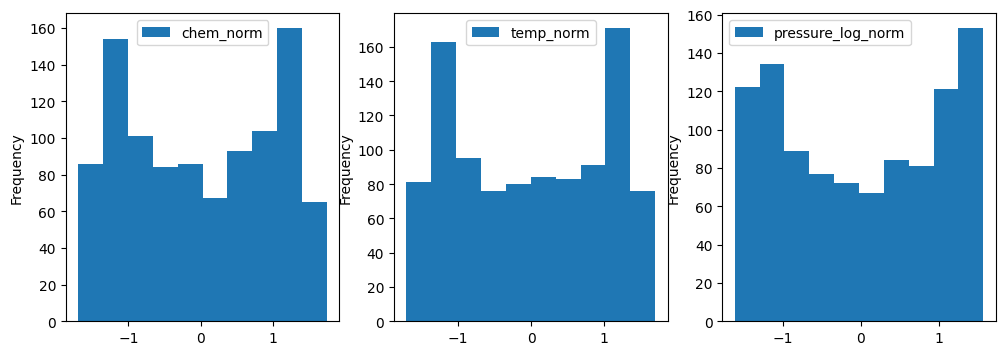

In [19]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
df['temp_norm'] = scaler.fit_transform(df[['Temperature']])


df['chem_norm'] = scaler.fit_transform(df[['Chemical Concentration']])

df['pressure_log'] = np.log(df['Pressure'])
df['pressure_log_norm'] = scaler.fit_transform(df[['pressure_log']])

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

df.plot.hist(y='chem_norm', ax=ax[0])
df.plot.hist(y='temp_norm', ax=ax[1])
df.plot.hist(y='pressure_log_norm', ax=ax[2])

In [20]:
df.describe()


,Time,Temperature,Pressure,Chemical Concentration,temp_norm,chem_norm,pressure_log,pressure_log_norm
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,50.000000,19.977372,1013.033617,4.989754,1.136868e-16,-3.979039e-16,6.920606,1.760725e-14
std,28.910854,3.574943,14.203350,1.436505,1.000500e+00,1.000500e+00,0.014023,1.000500e+00
min,0.000000,13.897407,990.284418,2.559310,-1.701567e+00,-1.692762e+00,6.897992,-1.613508e+00
25%,25.000000,16.386984,998.852247,3.576024,-1.004823e+00,-9.846385e-01,6.906607,-9.988590e-01
50%,50.000000,20.008666,1012.950967,4.970976,8.758279e-03,-1.307840e-02,6.920623,1.185521e-03
75%,75.000000,23.570373,1027.062114,6.398067,1.005554e+00,9.808653e-01,6.934458,9.882705e-01
max,100.000000,26.030294,1035.471676,7.486763,1.693999e+00,1.739122e+00,6.942612,1.570096e+00


<Axes: xlabel='Time'>

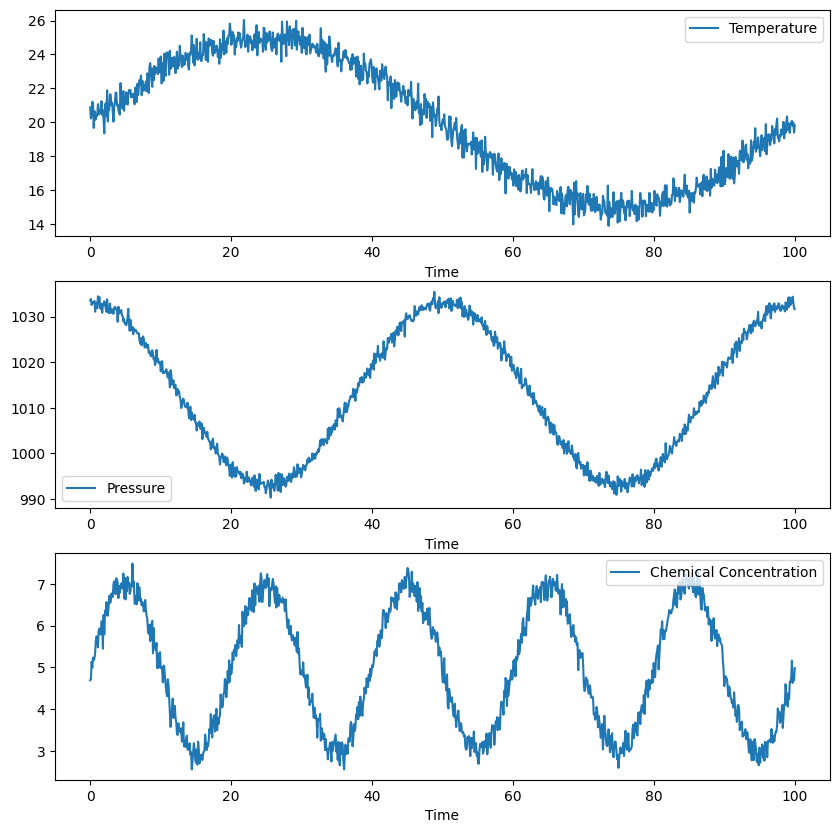

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

df.plot(x='Time', y='Temperature', ax=axs[0])
df.plot(x='Time', y='Pressure', ax=axs[1])
df.plot(x='Time', y='Chemical Concentration', ax=axs[2])



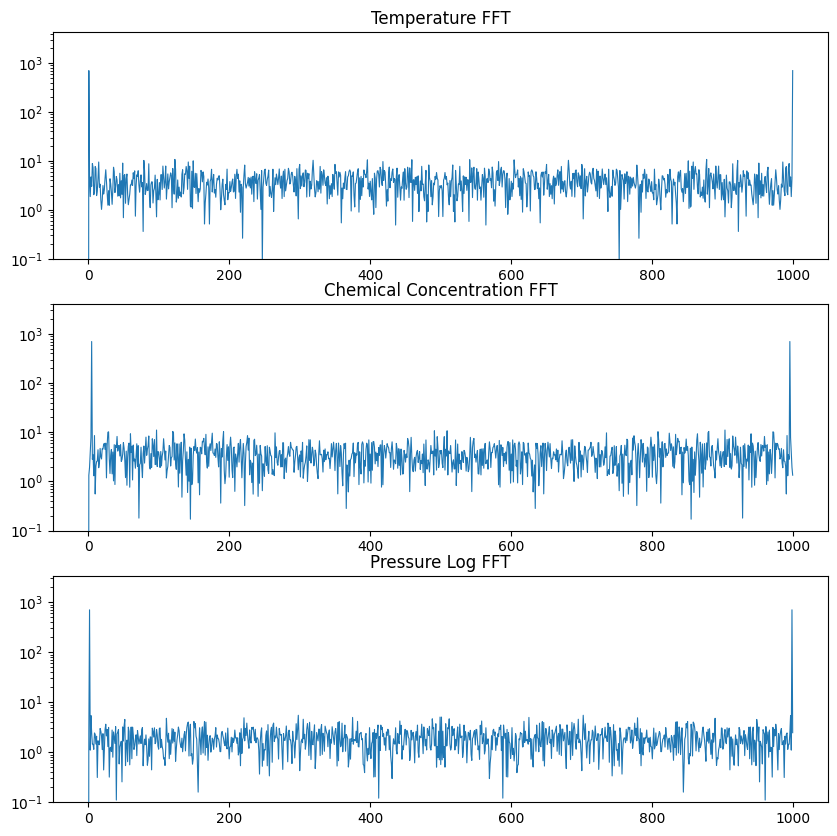

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Fourier Transform
temp_fft = np.fft.fft(df['temp_norm'])
chem_fft = np.fft.fft(df['chem_norm'])
pressure_fft = np.fft.fft(df['pressure_log_norm'])

import seaborn as sns

fig, ax = plt.subplots(3, 1, figsize=(10, 10))

sns.lineplot(data=np.abs(temp_fft), ax=ax[0], linewidth=0.8)
ax[0].set_title('Temperature FFT')
ax[0].set_yscale('log')
ax[0].set_ylim(bottom=0.1)

sns.lineplot(data=np.abs(chem_fft), ax=ax[1], linewidth=0.8)
ax[1].set_title('Chemical Concentration FFT')
ax[1].set_yscale('log')
ax[1].set_ylim(bottom=0.1)

sns.lineplot(data=np.abs(pressure_fft), ax=ax[2], linewidth=0.8)
ax[2].set_title('Pressure Log FFT')
ax[2].set_yscale('log')
ax[2].set_ylim(bottom=0.1)

plt.show()

In [23]:
import numpy as np
import plotly.graph_objects as go

for column in ['Temperature', 'Pressure', 'Chemical Concentration']:
    fft = np.fft.fft(df[column])
    freq = np.fft.fftfreq(len(df[column]), d=0.1001)
    amplitude = np.abs(fft)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=freq, y=amplitude, mode='lines'))
    fig.update_layout(
        title=f'Amplitude vs. Frequency for {column}',
        xaxis_title='Frequency',
        yaxis_title='Amplitude',
        yaxis_type='log'
    )
    fig.show()

### Statistical Analysis and Data Visualization


In [24]:
df.describe()


,Time,Temperature,Pressure,Chemical Concentration,temp_norm,chem_norm,pressure_log,pressure_log_norm
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,50.000000,19.977372,1013.033617,4.989754,1.136868e-16,-3.979039e-16,6.920606,1.760725e-14
std,28.910854,3.574943,14.203350,1.436505,1.000500e+00,1.000500e+00,0.014023,1.000500e+00
min,0.000000,13.897407,990.284418,2.559310,-1.701567e+00,-1.692762e+00,6.897992,-1.613508e+00
25%,25.000000,16.386984,998.852247,3.576024,-1.004823e+00,-9.846385e-01,6.906607,-9.988590e-01
50%,50.000000,20.008666,1012.950967,4.970976,8.758279e-03,-1.307840e-02,6.920623,1.185521e-03
75%,75.000000,23.570373,1027.062114,6.398067,1.005554e+00,9.808653e-01,6.934458,9.882705e-01
max,100.000000,26.030294,1035.471676,7.486763,1.693999e+00,1.739122e+00,6.942612,1.570096e+00


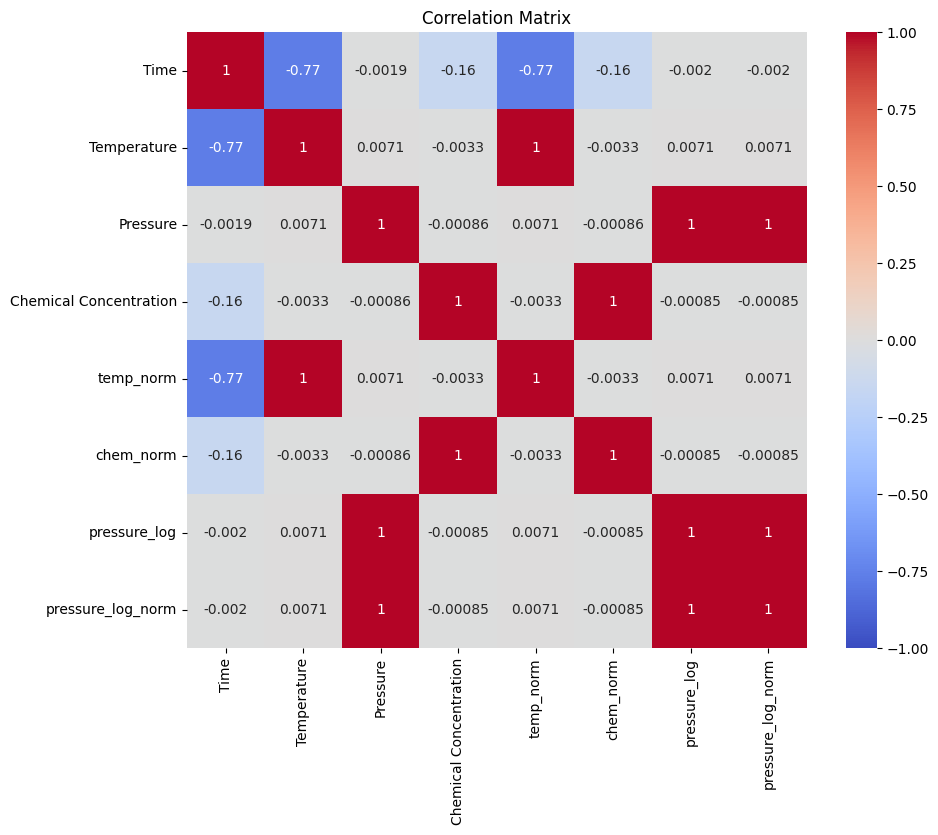

In [25]:
corr_matrix = df.corr()

# Just wanted to check if data transformation has any effect on the correlation matrix
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


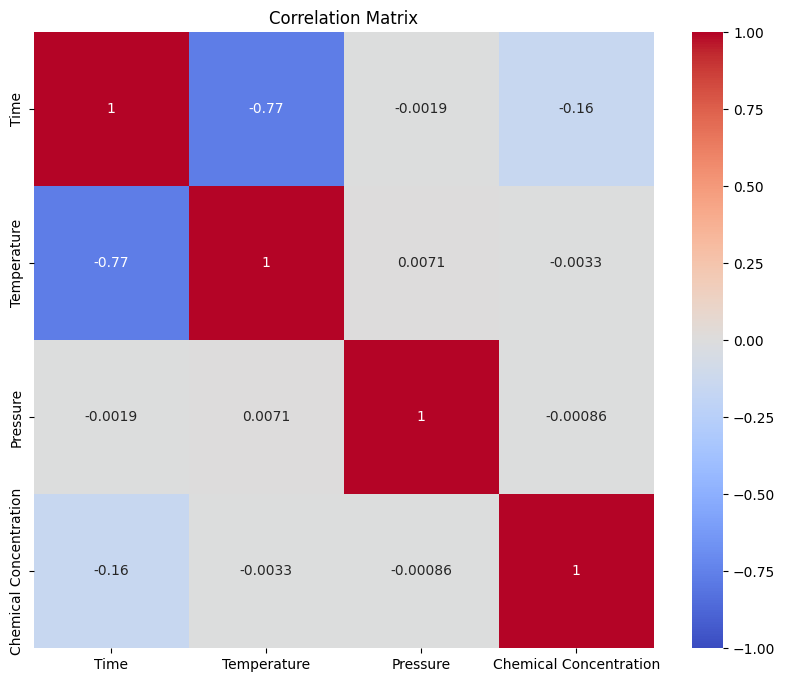

In [26]:
corr_matrix = df[['Time', 'Temperature', 'Pressure', 'Chemical Concentration']].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

We can see that only Temperature and Time have a strong negative correlation. I supose It comes from the fact that 
their relationship follows a sine wave with one full period. We can see that effect but less pronounced in Chemical Concentration and Time. 


In [27]:
import scipy.stats as stats
import numpy as np

def show_pearson_correlation(df, x, y):
    print("\nPearson's correlation coefficient:")
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x], df[y])
    print("Correlation coefficient:", r_value)
    print("Slope:", slope)
    print("P-value:", p_value)
    print("Standard error:", std_err)
    
    return slope, intercept, r_value, p_value, std_err

def show_spearman_correlation(df, x, y):
    print("\nSpearman's rank correlation coefficient:")
    rho, p_value = stats.spearmanr(df[x], df[y])
    print("Correlation coefficient:", rho)
    print("P-value:", p_value)
    return rho, p_value

def show_anova_test(df, cols):
    print("\nANOVA test:")
    f_value, p_value = stats.f_oneway(*df[cols].values.T)
    print("F-value:", f_value)
    print("P-value:", p_value)
    return f_value, p_value


Pearson's correlation coefficient:
Correlation coefficient: -0.7706960694253783
Slope: -0.09529966293143435
P-value: 1.5285940870507657e-197
Standard error: 0.0024941393315445533

Spearman's rank correlation coefficient:
Correlation coefficient: -0.7465751545751547
P-value: 7.962434903475595e-179

ANOVA test:
F-value: 928941.1594840437
P-value: 0.0


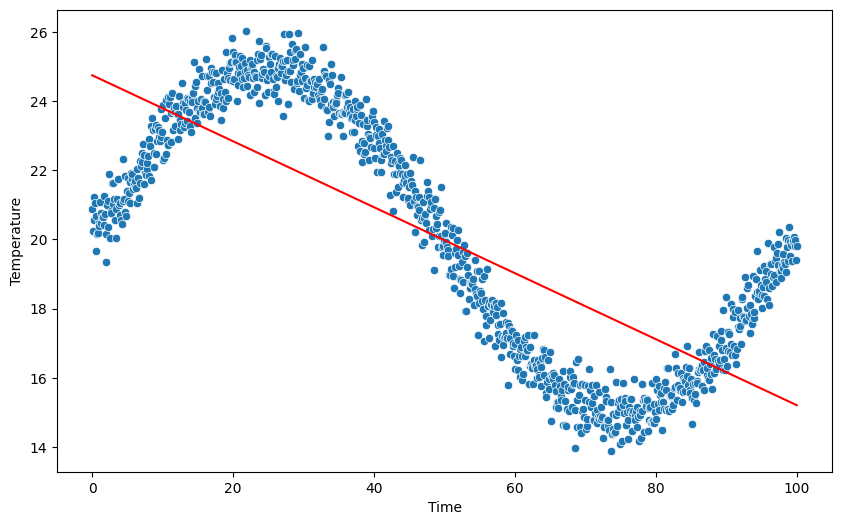

In [43]:
slope, intercept, r_value, p_value, std_err = show_pearson_correlation(df, 'Time', 'Temperature')
show_spearman_correlation(df, 'Time', 'Temperature')
show_anova_test(df, ['Time', 'Temperature', 'Pressure', 'Chemical Concentration'])

# Plotting the Pearson correlation with original distribution and slope
plt.figure(figsize=(10, 6))
sns.scatterplot(df ,x='Time', y='Temperature')
sns.lineplot(x=df['Time'], y=intercept + slope * df['Time'], color='red')
plt.show()


Pearson's correlation coefficient:
Correlation coefficient: -0.15611269399824587
Slope: -0.007756832182633155
P-value: 7.013519043094821e-07
Standard error: 0.0015535427861486863

Spearman's rank correlation coefficient:
Correlation coefficient: -0.14921627321627323
P-value: 2.1447108234802473e-06

ANOVA test:
F-value: 928941.1594840437
P-value: 0.0


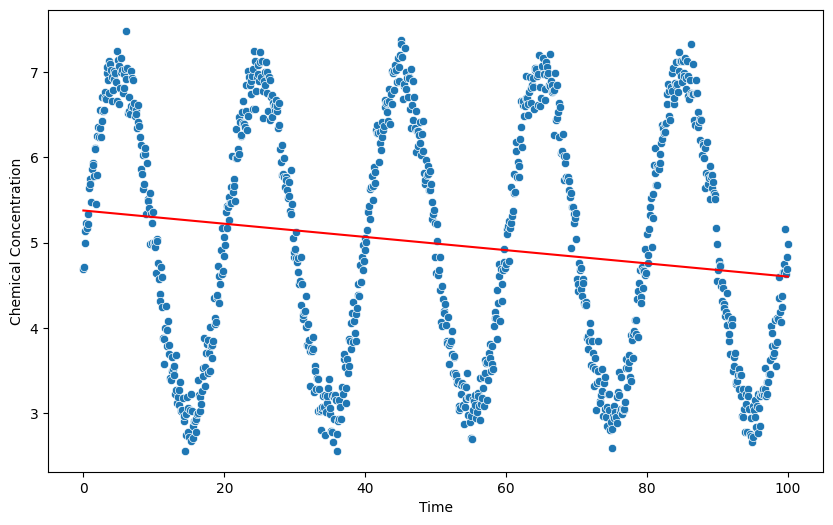

In [41]:
slope, intercept, r_value, p_value, std_err = show_pearson_correlation(df, 'Time', 'Chemical Concentration')
show_spearman_correlation(df, 'Time', 'Chemical Concentration')
show_anova_test(df, ['Time', 'Temperature', 'Pressure', 'Chemical Concentration'])

# Plotting the Pearson correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(df ,x='Time', y='Chemical Concentration')
sns.lineplot(x=df['Time'], y=intercept + slope * df['Time'], color='red')
plt.show()





Shapiro-Wilk test
Statistic: 0.9205110980424489
p-value: 1.592913466850673e-22


<Axes: ylabel='Frequency'>

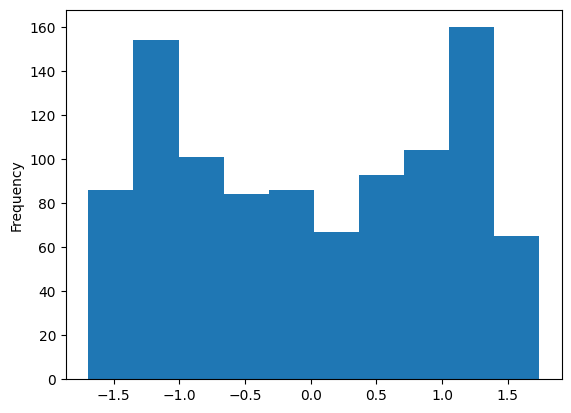

In [29]:
# Test to check if data is normally distributed
print("\nShapiro-Wilk test")
shapiro_stat, shapiro_p = stats.shapiro(df['chem_norm'])
print("Statistic:", shapiro_stat)
print("p-value:", shapiro_p)

df.chem_norm.plot.hist()

We see that data is not normally distributed. But for some reason test indicates that it is



Shapiro-Wilk test
Statistic: 0.9198369555435641
p-value: 1.2975628679967797e-22


<Axes: ylabel='Frequency'>

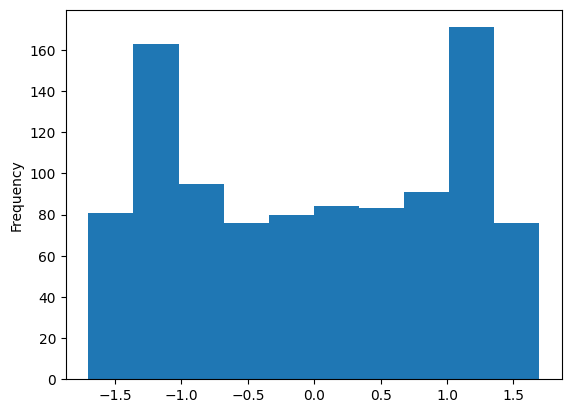

In [30]:
print("\nShapiro-Wilk test")
shapiro_stat, shapiro_p = stats.shapiro(df['temp_norm'])
print("Statistic:", shapiro_stat)
print("p-value:", shapiro_p)

df.temp_norm.plot.hist()


Same result

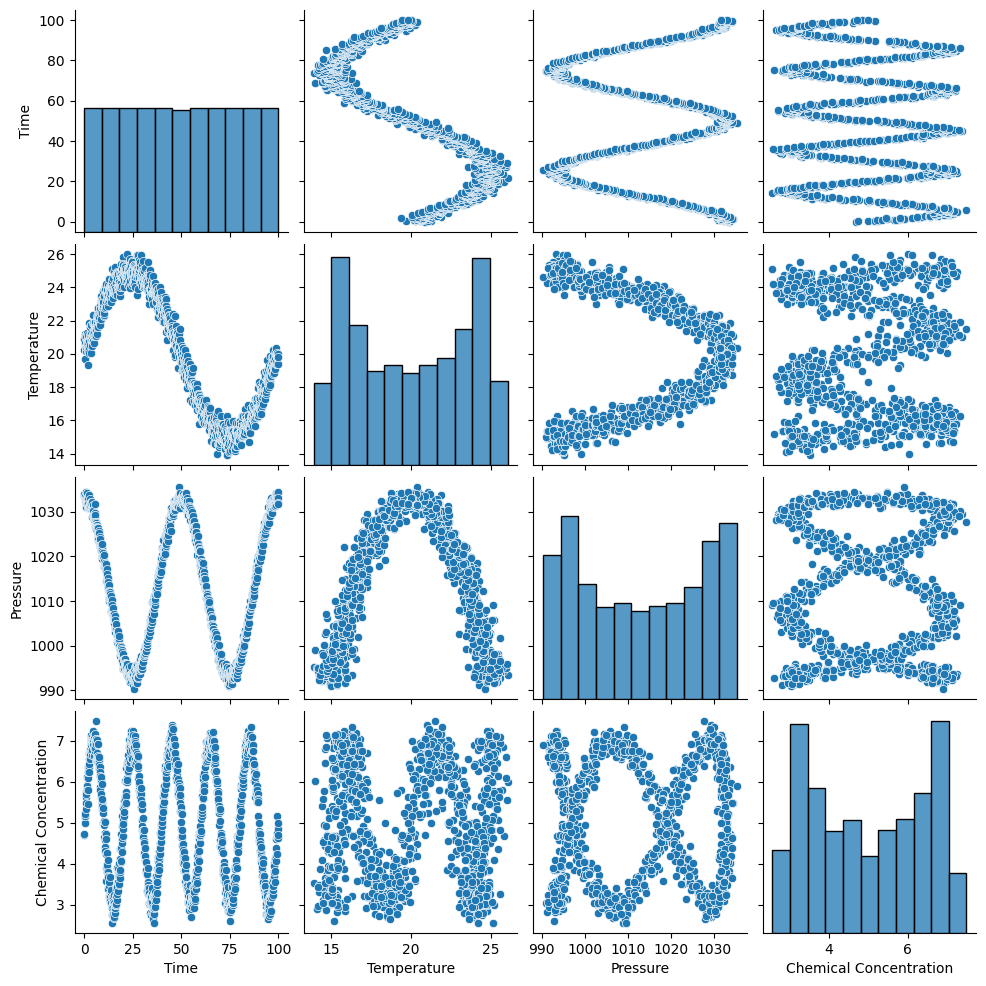

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Time', 'Temperature', 'Pressure', 'Chemical Concentration']])
plt.show()






We can see interesting patterns when plotting variables that both follow sine wave.


This kind of data could describe some periodic processes